In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs, make_circles
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Linearly Separable 1 

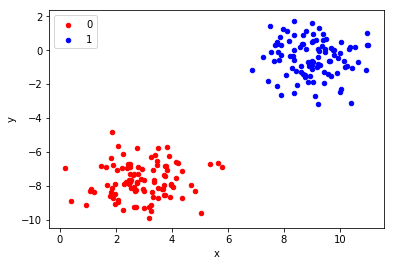

In [2]:
xSep1, ySep1 = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1000)
df1 = pd.DataFrame(dict(x=xSep1[:,0], y=xSep1[:,1], label=ySep1))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df1.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# Linearly Separable 2

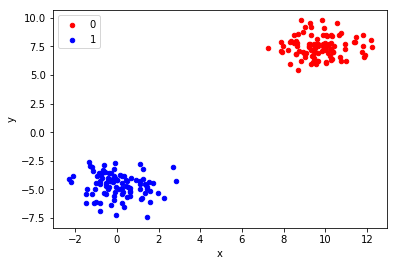

In [3]:
xSep2, ySep2 = make_blobs(n_samples=200, centers=2, n_features=2, random_state=2020)
df2 = pd.DataFrame(dict(x=xSep2[:,0], y=xSep2[:,1], label=ySep2))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# Non-Linearly Separable 1

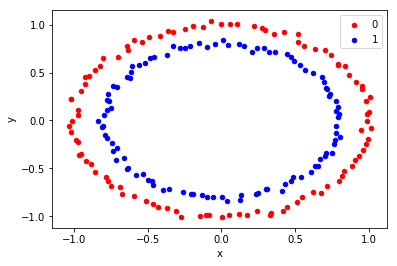

In [4]:
xNSep1, yNSep1 = make_circles(n_samples=200, random_state=502, noise=0.02)
df2 = pd.DataFrame(dict(x=xNSep1[:,0], y=xNSep1[:,1], label=yNSep1))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# Non-Linearly Separable 2

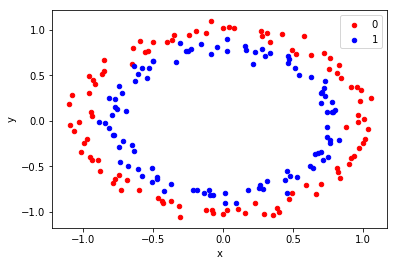

In [5]:
xNSep2, yNSep2 = make_circles(n_samples=200, random_state=502, noise=0.05)
df2 = pd.DataFrame(dict(x=xNSep2[:,0], y=xNSep2[:,1], label=yNSep2))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [6]:
#Function to plot decision boundary. Path is location of the image file. If flag is True the graph is displayed otherwise the image is saved.
def makePlot(w, X, Y, path="", flag=False):
    
    #points corresponding to decsion boundary
    dx = np.linspace(-15, 15, 1000);
    dy = (-1)*(w[0]*dx+w[2])/w[1]
    
    #appending the x and y coordinate of data points. 
    dx = np.append(dx, X[:, 0])
    dy = np.append(dy, X[:, 1])
    
    # giving line, class 1, class 2 a different color. Line is yellow coloured.
    C = [2]*1000
    C.extend(Y)
    plt.scatter(dx, dy, s=4, c=C)
    if flag == False:
        plt.savefig(path)
        plt.clf()
    else:
        print("Final Decision Boundary")
        plt.show()

### Maximum Number of Epochs is 50. If the required decision boundary is acheived before 50 epochs the loop breaks. The image after each epochs are stored in the img folders. The path parameter is directory where images are stored. Each image is named as iteration_number.jpg. Alpha is the learning rate. 

In [7]:
#Perceptron learning function
def learn(X_, Y_, alpha, path="", w=[], plotEveryEpoch=True, epoch=50):
    np.random.seed(2343)
    if len(w) == 0:
        w = np.random.randn(len(X_[0])+1)
    Y = [1]*len(Y_)
    for i in range(len(Y_)):
        if Y_[i] == 0:
            Y[i] = -1
    X = np.insert(X_, len(X_[0]), 1.0, axis=1)
    num_epoch = epoch
    for i in range(epoch):
        flag = False
        O = np.dot(X, w)        
        for j in range(len(O)):
            o = O[j]
            if o > 0:
                o = 1.0
            else:
                o = -1.0
            if o!=Y[j]:
                flag = True
                for k in range(len(w)):
                    w[k] = w[k]+alpha*X[j][k]*o
        if flag == False:
            num_epoch = i
            break
        if plotEveryEpoch:
            makePlot(w, X[:, :-1], Y, path+"/"+str(i)+".jpg")
                
    makePlot(w, X[:, :-1], Y, path+"/"+str(i)+".jpg", True)
    O = np.dot(X, w)
    error = 0
    for i in range(len(O)):
        o = O[i]
        if o > 0:
            o = 1
        else:
            o = -1
        if o != Y[i]:
            error+=1
                    
    print("Number of Samples: ", len(Y))
    print("Number of Misclassifications: ", error)
    print("[w0, w1, b] = ", w)
    print("Number of Epochs: ", num_epoch)

# Comparsion of Perceptron Learning Algorithm on Linear and Non-Linear DataSets

Linear Data 1
Final Decision Boundary


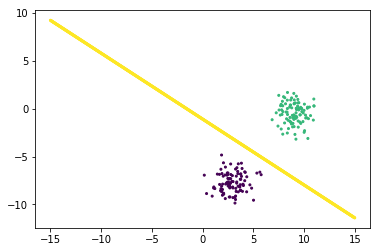

Number of Samples:  200
Number of Misclassifications:  0
[w0, w1, b] =  [0.55533858 0.8063758  0.87116387]
Number of Epochs:  3

Linear Data 2
Final Decision Boundary


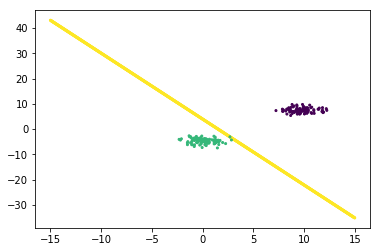

Number of Samples:  200
Number of Misclassifications:  0
[w0, w1, b] =  [-0.56437315 -0.21641334  0.86316387]
Number of Epochs:  19

Non-Linear Data 1
Final Decision Boundary


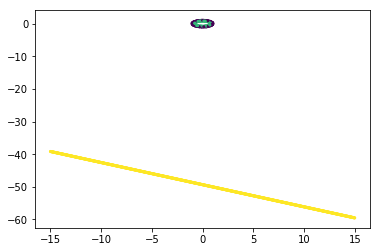

Number of Samples:  200
Number of Misclassifications:  100
[w0, w1, b] =  [0.00119866 0.00176622 0.08716387]
Number of Epochs:  50

Non-Linear Data 2
Final Decision Boundary


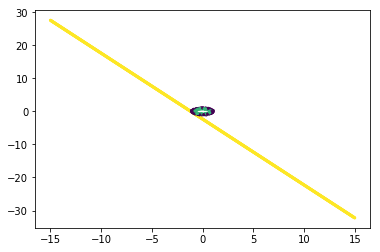

Number of Samples:  200
Number of Misclassifications:  99
[w0, w1, b] =  [0.04210236 0.0211223  0.04916387]
Number of Epochs:  50


In [8]:
print("Linear Data 1")
learn(xSep1, ySep1, -0.001, "img/sep/1")

print("\nLinear Data 2")
learn(xSep2, ySep2, -0.001, "img/sep/2")

print("\nNon-Linear Data 1")
learn(xNSep1, yNSep1, -0.001, "img/non-sep/1")

print("\nNon-Linear Data 2")
learn(xNSep2, yNSep2, -0.001, "img/non-sep/2")

The perceptron learning algorithm was run for a maximum of 50 epochs. It was observed that the perceptron model was able to generate a decision boundary that separates the linearly separable data in less than 50 iterations. 100% Accuracy was obtained for linearly separable data. On the other hand it was not able to generate a decision boundary for non-linear data. It was expected to perform this way in this case. The accuracy was near to 50%. The images for every epoch can be found in “img/sep” for separable data and “img/non-sep” for non separable data. The images are numbered by the iteration number.
It was observed from epoch-by-epoch decision boundary that decision boundary shifts(by change in intercept) and rotates(by change in slope).

# Sensitivity to Weights and Biases

### Small Weights

Linear Data 1
Final Decision Boundary


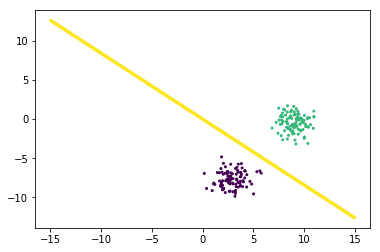

Number of Samples:  200
Number of Misclassifications:  0
[w0, w1, b] =  [0.6084958862943075, 0.7227733334049017, -6.938893903907228e-18]
Number of Epochs:  2

Linear Data 2
Final Decision Boundary


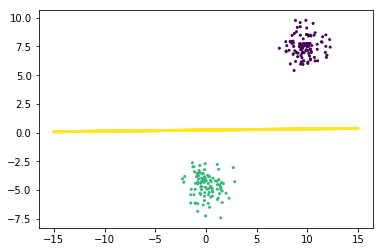

Number of Samples:  200
Number of Misclassifications:  0
[w0, w1, b] =  [0.004466685999823714, -0.4600104163393581, 0.10000000000000007]
Number of Epochs:  1

Non-Linear Data 1
Final Decision Boundary


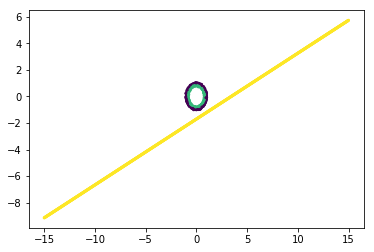

Number of Samples:  200
Number of Misclassifications:  100
[w0, w1, b] =  [-0.006380583477747056, 0.012881158949714993, 0.022000000000000006]
Number of Epochs:  50

Non-Linear Data 2
Final Decision Boundary


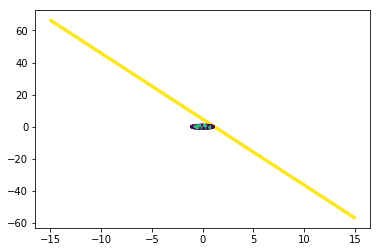

Number of Samples:  200
Number of Misclassifications:  100
[w0, w1, b] =  [0.01366231305718319, 0.0033295327588939994, -0.016000000000000014]
Number of Epochs:  50


In [9]:
print("Linear Data 1")
learn(xSep1, ySep1, -0.001, w=[0.0, 0.0, 0.0], plotEveryEpoch=False)

print("\nLinear Data 2")
learn(xSep2, ySep2, -0.001, w=[0.0, 0.0, 0.0], plotEveryEpoch=False)

print("\nNon-Linear Data 1")
learn(xNSep1, yNSep1, -0.001, w=[0.0, 0.0, 0.0], plotEveryEpoch=False)

print("\nNon-Linear Data 2")
learn(xNSep2, yNSep2, -0.001, w=[0.0, 0.0, 0.0], plotEveryEpoch=False)

### Large Weights

Linear Data 1
Final Decision Boundary


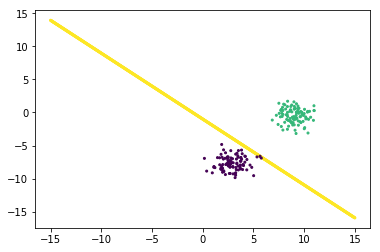

Number of Samples:  200
Number of Misclassifications:  0
[w0, w1, b] =  [99.85318967652103, 100.17229284315519, 99.97399999999988]
Number of Epochs:  26

Linear Data 2
Final Decision Boundary


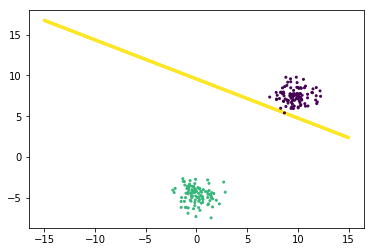

Number of Samples:  200
Number of Misclassifications:  0
[w0, w1, b] =  [-4.788929135709967, -10.009133616343352, 95.73199999997962]
Number of Epochs:  169

Non-Linear Data 1
Final Decision Boundary


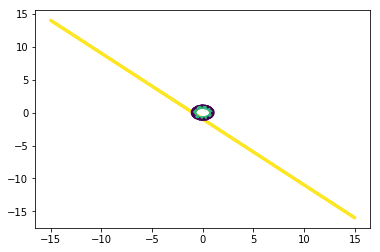

Number of Samples:  200
Number of Misclassifications:  88
[w0, w1, b] =  [98.82773332899829, 98.81611532803291, 96.97099999998554]
Number of Epochs:  50

Non-Linear Data 2
Final Decision Boundary


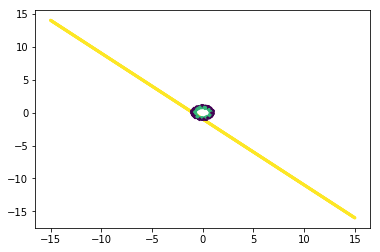

Number of Samples:  200
Number of Misclassifications:  85
[w0, w1, b] =  [98.89872587201225, 98.89349644691237, 96.84999999998496]
Number of Epochs:  50


In [10]:
print("Linear Data 1")
learn(xSep1, ySep1, -0.001, w=[100.0, 100.0, 100.0], plotEveryEpoch=False)

print("\nLinear Data 2")
learn(xSep2, ySep2, -0.001, w=[100.0, 100.0, 100.0], plotEveryEpoch=False, epoch=1000)

print("\nNon-Linear Data 1")
learn(xNSep1, yNSep1, -0.001, w=[100.0, 100.0, 100.0], plotEveryEpoch=False)

print("\nNon-Linear Data 2")
learn(xNSep2, yNSep2, -0.001, w=[100.0, 100.0, 100.0], plotEveryEpoch=False)

The convergence and final decision boundary are sensitive to initialization of weights and biases. Based on initialisation it was observed that when weights and biases were big the convergence was slower(more number of epochs to converge). With small weights the convergence was faster. It is evident from the above experiment. With large weights it takes 26 and 169 epochs to converge as opposed to only 2 and 1 epochs for respective linear datasets.


# Using SVM

Linear Data 1
Accuracy: 1.0
Final Decision Boundary


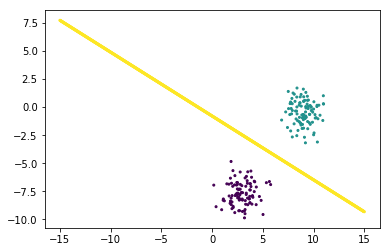

Linear Data 2
Accuracy: 1.0
Final Decision Boundary


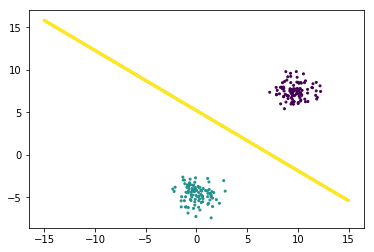

Non-Linear Data 1
Accuracy: 0.505
Final Decision Boundary


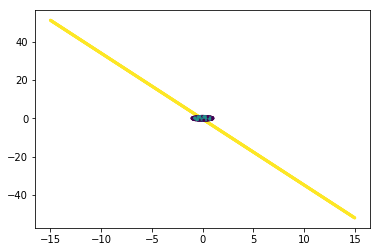

Non-Linear Data 2
Accuracy: 0.51
Final Decision Boundary


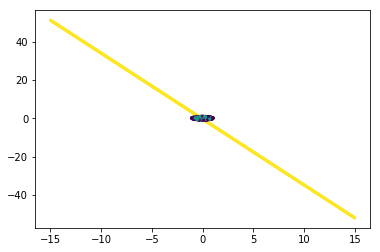

In [11]:
clf = SVC(kernel = 'linear', random_state=10321)
clf.fit(xSep1, ySep1)
w = clf.coef_
w = np.append(w, clf.intercept_)
print("Linear Data 1")
print("Accuracy:", accuracy_score(ySep1, clf.predict(xSep1)))
makePlot(w, xSep1, ySep1, flag=True)

clf.fit(xSep2, ySep2)
w = clf.coef_
w = np.append(w, clf.intercept_)
print("Linear Data 2")
print("Accuracy:", accuracy_score(ySep2, clf.predict(xSep2)))
makePlot(w, xSep2, ySep2, flag=True)

clf.fit(xNSep1, yNSep1)
w = clf.coef_
w = np.append(w, clf.intercept_)
print("Non-Linear Data 1")
print("Accuracy:", accuracy_score(yNSep1, clf.predict(xNSep1)))
makePlot(w, xNSep1, yNSep1, flag=True)

clf.fit(xNSep2, yNSep2)
w = clf.coef_
w = np.append(w, clf.intercept_)
print("Non-Linear Data 2")
print("Accuracy:", accuracy_score(yNSep2, clf.predict(xNSep2)))
makePlot(w, xNSep2, yNSep2, flag=True)

# Using Logistic Regression

/home/ssirowa/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Linear Data 1
Accuracy: 1.0
Final Decision Boundary


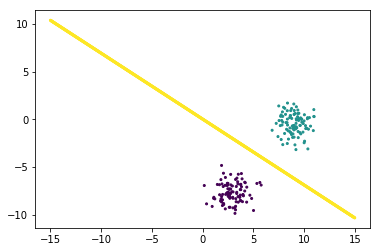

Linear Data 2
Accuracy: 1.0
Final Decision Boundary


/home/ssirowa/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


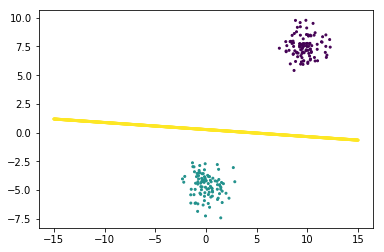

/home/ssirowa/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Non-Linear Data 1
Accuracy: 0.505
Final Decision Boundary


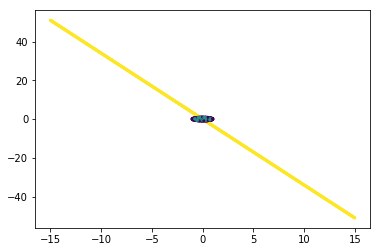

/home/ssirowa/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Non-Linear Data 2
Accuracy: 0.51
Final Decision Boundary


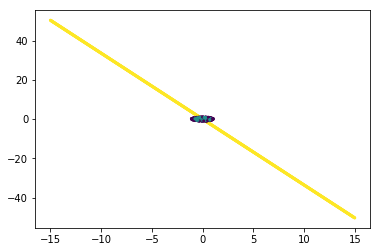

In [12]:
clf = LogisticRegression(random_state=10321)
clf.fit(xSep1, ySep1)
w = clf.coef_
w = np.append(w, clf.intercept_)
print("Linear Data 1")
print("Accuracy:", accuracy_score(ySep1, clf.predict(xSep1)))
makePlot(w, xSep1, ySep1, flag=True)

clf.fit(xSep2, ySep2)
w = clf.coef_
w = np.append(w, clf.intercept_)
print("Linear Data 2")
print("Accuracy:", accuracy_score(ySep2, clf.predict(xSep2)))
makePlot(w, xSep2, ySep2, flag=True)

clf.fit(xNSep1, yNSep1)
w = clf.coef_
w = np.append(w, clf.intercept_)
print("Non-Linear Data 1")
print("Accuracy:", accuracy_score(yNSep1, clf.predict(xNSep1)))
makePlot(w, xNSep1, yNSep1, flag=True)

clf.fit(xNSep2, yNSep2)
w = clf.coef_
w = np.append(w, clf.intercept_)
print("Non-Linear Data 2")
print("Accuracy:", accuracy_score(yNSep2, clf.predict(xNSep2)))
makePlot(w, xNSep2, yNSep2, flag=True)

Logistic Regression and SVM give us similar decsion boundaries. Both are unable to separate non-linear data. Speed of convergence follows the order Perceptron>LR>SVM